In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
data_dir = r"D:\sneha\images\train"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    data_dir, 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='binary'
)

print(train_data.class_indices)  # Should output {'stressed': 0, 'not_stressed': 1}


Found 28821 images belonging to 2 classes.
{'not_stressed': 0, 'stressed': 1}


In [5]:
# Image size & batch size
img_size = (64, 64)
batch_size = 32


In [6]:
# Mapping 7 categories into 2 groups
category_map = {
    'angry': 'stressed',
    'disgust': 'stressed',
    'fear': 'stressed',
    'sad': 'stressed',
    'happy': 'not_stressed',
    'neutral': 'not_stressed',
    'surprise': 'not_stressed'
}


In [7]:
def binary_class_mapper(category):
    return category_map[category]


In [8]:
# Data augmentation & preprocessing
datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_data = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

Found 28821 images belonging to 2 classes.


In [10]:
train_data.class_indices = {category: binary_class_mapper(category) for category in train_data.class_indices.keys()}

KeyError: 'not_stressed'

In [ ]:
# Define CNN Model
model = Sequential([
    Convolution2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2,2)),
    
    Convolution2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Convolution2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Convolution2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Model
history = model.fit(train_data, epochs=1,batch_size=100)


901/901 ━━━━━━━━━━━━━━━━━━━━ 703s 780ms/step - accuracy: 0.0145 - loss: -3543456546816.0000


In [ ]:
# Get a batch of images and labels
images, labels = next(train_data)

# Print first 5 labels (should be 0 for stressed, 1 for not_stressed)
print(labels[:5])


[0. 1. 1. 0. 1.]


C:\Users\SRIRAM\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\SRIRAM\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 283s 308ms/step - accuracy: 0.5501 - loss: 0.6865
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 91s 101ms/step - accuracy: 0.6461 - loss: 0.6252
Epoch 3/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 93s 103ms/step - accuracy: 0.6973 - loss: 0.5707
Epoch 4/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 95s 105ms/step - accuracy: 0.7219 - loss: 0.5351
Epoch 5/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 243s 270ms/step - accuracy: 0.7427 - loss: 0.5113
Epoch 6/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 173s 191ms/step - accuracy: 0.7632 - loss: 0.4849
Epoch 7/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 92s 102ms/step - accuracy: 0.7717 - loss: 0.4661
Epoch 8/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 91s 101ms/step - accuracy: 0.7813 - loss: 0.4461
Epoch 9/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 88s 98ms/step - accuracy: 0.7957 - loss: 0.4286
Epoch 10/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 87s 96ms/step - accuracy: 0.8109 - loss: 0.3994


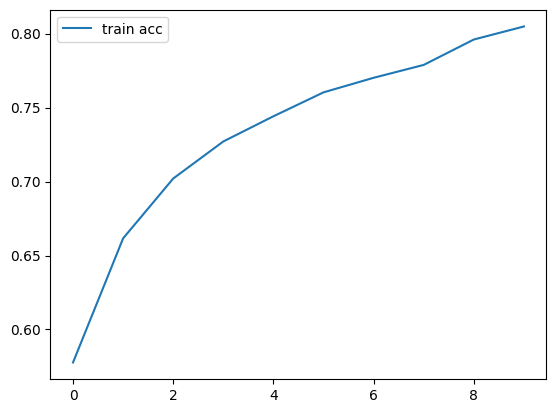

In [11]:
# Define CNN Model
model = Sequential([
    Convolution2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2,2)),
    
    Convolution2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Convolution2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_data, epochs=10,batch_size=1500)

# Save Model
model.save("face_stress_model1.h5")

# Plot Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
